In [1]:
import pandas as pd
pd.options.display.max_rows = 20
%matplotlib inline

In [8]:
kvaliteta = pd.read_csv('tabela.csv', sep=';')

In [9]:
kvaliteta

,﻿Leto,Dobavitelj,Sorta,Kvaliteta,Količina [kg]
0,2014-07-14,Kodrič Milena,Redhaven,I.,820.000
1,2014-07-15,Kodrič Milena,Redhaven,I.,659.000
2,2014-07-16,Kodrič Milena,Redhaven,I.,1.073
3,2014-07-17,Kodrič Milena,Redhaven,I.,1.364
4,2014-07-18,Kodrič Milena,Redhaven,I.,1.135
5,2014-07-21,Kodrič Milena,Redhaven,I.,1.342
6,2014-07-22,Kodrič Milena,Redhaven,I.,924.000
7,2014-07-24,Kodrič Milena,Redhaven,I.,1.035
8,2014-07-30,Levak Andrej,James Grieve,I.,1.453
9,2014-08-06,BIF-VORPO,Viljamovka,I.,21.789


# 1 Analiza po kvaliteti sadja

In [15]:
kvaliteta['Datum'] = pd.to_datetime(kvaliteta['Datum'])
kvaliteta_2014 = kvaliteta[kvaliteta['Datum'].dt.year == 2014]
kvaliteta_2014

0       820.000
1       659.000
2         1.073
3         1.364
4         1.135
5         1.342
6       924.000
7         1.035
8         1.453
9        21.789
         ...   
1051      3.550
1052    303.000
1053    644.000
1054      1.784
1055      5.328
1056     15.353
1057      4.016
1058     10.422
1059      1.698
1060     17.119
Name: Količina [kg], dtype: float64

In [5]:
kvaliteta_2015 = kvaliteta[kvaliteta['Datum'].dt.year == 2015]
kvaliteta_2015

,Datum,Dobavitelj,Sorta,Kvaliteta,Količina [kg]
479,2015-05-08,Levak Andrej,Delcorf,I.,1652
480,2015-08-13,Levak Andrej,Delcorf,I.,721
481,2015-08-14,Umek Jože,Viljamovka,Industrija,7594
482,2015-08-14,Umek Jože,Viljamovka,Industrija,3807
483,2015-08-17,Umek Jože,Viljamovka,Industrija,5605
484,2015-08-18,BIF-VORPO,Viljamovka,I.,14133
485,2015-08-18,Rojc,Viljamovka,Industrija,4663
486,2015-08-18,Rojc,Viljamovka,Industrija,1755
487,2015-08-19,Pinterič Antonija,Viljamovka,Industrija,3843
488,2015-08-19,BIF-VORPO,Viljamovka,I.,16869


In [302]:
količina_po_kvaliteti = kvaliteta.groupby([kvaliteta['Datum'].dt.year, kvaliteta['Kvaliteta']]).sum()
količina_po_kvaliteti = količina_po_kvaliteti.rename_axis(['Leto', 'Kvaliteta'])
količina_po_kvaliteti

Količina [kg]
Leto Kvaliteta                
2014 I.                3687052
     Industrija          32581
2015 I.                4839207
     Industrija         187023

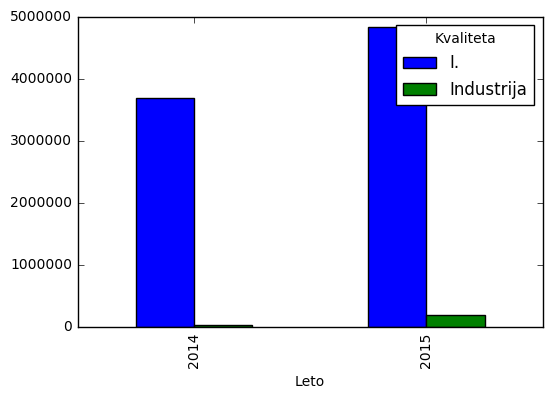

In [303]:
količina_po_kvaliteti.unstack().plot(kind='bar', y='Količina [kg]')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002D94DCCB0F0>], dtype=object)

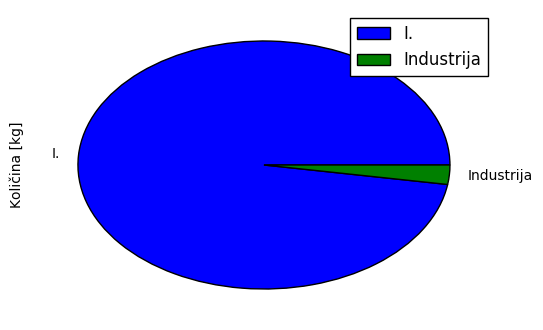

In [304]:
skupna_količina_po_kvaliteti = kvaliteta.groupby('Kvaliteta').sum()
skupna_količina_po_kvaliteti.plot(kind='pie', subplots='True')

In [306]:
količina_po_letih = kvaliteta.groupby(kvaliteta['Datum'].dt.year).sum()
količina_po_letih = količina_po_letih.rename_axis('Leto')
količina_po_letih

,Količina [kg]
Leto,
2014,3719633
2015,5026230


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002D94DA88A20>], dtype=object)

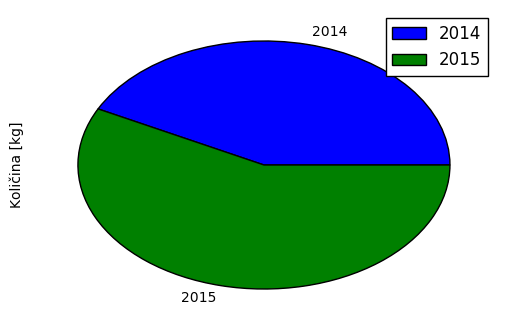

In [307]:
količina_po_letih.plot(kind='pie', subplots=True)

# 2 Analiza po dobaviteljih 

In [119]:
količina_na_dobavitelja = kvaliteta.groupby('Dobavitelj').aggregate(sum).sort_values('Količina [kg]', ascending = False)[:10]

In [115]:
količina_na_dobavitelja

,Količina [kg]
Dobavitelj,
Univerza MB,2058909
VRTOVI VOČA,1020052
Levak Andrej,998190
Šušterič Vojko,816309
Molan Mitja,476179
Lah Leon,404444
Martini Rene,280355
Mlakar Branko,263371
Novak Ludvik,261215


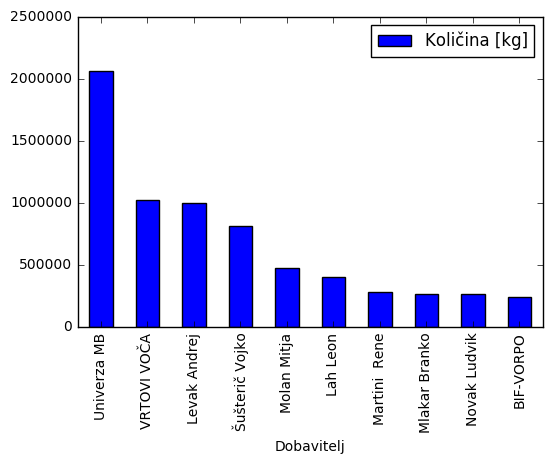

In [289]:
količina_na_dobavitelja.plot(kind='bar', y='Količina [kg]')

In [121]:
količina_na_dobavitelja_index = količina_na_dobavitelja.reset_index()
količina_na_dobavitelja_index

,Dobavitelj,Količina [kg]
0,Univerza MB,2058909
1,VRTOVI VOČA,1020052
2,Levak Andrej,998190
3,Šušterič Vojko,816309
4,Molan Mitja,476179
5,Lah Leon,404444
6,Martini Rene,280355
7,Mlakar Branko,263371
8,Novak Ludvik,261215
9,BIF-VORPO,241504


In [123]:
prva_kvaliteta = kvaliteta[kvaliteta['Kvaliteta'] == 'I.']
dobavitelji_prva = prva_kvaliteta.groupby('Dobavitelj').sum().sort_values('Količina [kg]', ascending = False)[:10]
dobavitelji_prva_index = dobavitelji_prva.reset_index()
dobavitelji_prva_index

,Dobavitelj,Količina [kg]
0,Univerza MB,2058909
1,VRTOVI VOČA,1020052
2,Levak Andrej,927314
3,Šušterič Vojko,816309
4,Molan Mitja,462963
5,Lah Leon,404444
6,Martini Rene,280355
7,Novak Ludvik,261215
8,Mlakar Branko,261103
9,BIF-VORPO,241504


In [124]:
pd.merge(količina_na_dobavitelja_index, dobavitelji_prva_index)

,Dobavitelj,Količina [kg]
0,Univerza MB,2058909
1,VRTOVI VOČA,1020052
2,Šušterič Vojko,816309
3,Lah Leon,404444
4,Martini Rene,280355
5,Novak Ludvik,261215
6,BIF-VORPO,241504


Vidimo, da so največji dobavitelji pripeljali skoraj samo jabolka 1. kvalitete. Podjetje namreč industrijo plačuje zelo slabo in dovoljuje proizvajalcem, da določen procent industrije prodajo sami kam drugam, zato sem pripeljejo le najlepša jabolka.

In [321]:
kvaliteta.groupby(['Dobavitelj', 'Sorta']).size()

Dobavitelj      Sorta        
AA 1            Royal Gala        1
AA 2            Royal Gala        1
AA 3            Royal Gala        2
AA1             Royal Gala        1
AA2             Royal Gala        1
AA4             Royal Gala        4
AA5             Royal Gala        1
AA6             Royal Gala        3
AA7             Royal Gala        1
AA8             Braeburn          2
                                 ..
Šušterič Vojko  Idared            6
                Pinova            3
                Royal Gala       17
                Zlati Delišes     9
Žganec Robert   Elstar            2
                Gala              1
                Gala Must         1
                Idared            2
                Jonagold          3
                Zlati Delišes     2
dtype: int64

# 3 Analiza po sortah

In [277]:
količina_po_sortah = kvaliteta.groupby(['Sorta']).aggregate(sum).sort_values('Količina [kg]', ascending=False)[:10].reset_index()
količina_po_sortah

,Sorta,Količina [kg]
0,Zlati Delišes,1961001
1,Royal Gala,1859515
2,Idared,1036789
3,Evelina,908451
4,Braeburn,867193
5,Granny Smith,508345
6,Jonagold,405566
7,Pinova,251666
8,Fuji,248083
9,Viljamovka,201687


Zdaj 10 skupno količinsko najbolj zastopanih sort analizirajmo po letih.

In [282]:
top_sorte = pd.DataFrame(količina_po_sortah['Sorta'])
top_sorte
tabela_le_top_sorte = pd.merge(kvaliteta, top_sorte)
tabela_top_sort = tabela_le_top_sorte.set_index('Datum')
tabela_top_sort

,Dobavitelj,Sorta,Kvaliteta,Količina [kg]
Datum,,,,
2014-06-08,BIF-VORPO,Viljamovka,I.,21789
2014-08-08,Umek Jožefa,Viljamovka,Industrija,7680
2014-08-08,BIF-VORPO,Viljamovka,I.,18540
2014-08-08,BIF-VORPO,Viljamovka,I.,4099
2014-11-08,Umek Jožefa,Viljamovka,Industrija,9627
2014-11-08,BIF-VORPO,Viljamovka,I.,21457
2014-08-13,Pinterič Antonija,Viljamovka,Industrija,2035
2014-08-13,BIF-VORPO,Viljamovka,I.,15947
2014-08-14,Kovačič Alojz,Viljamovka,Industrija,2005


In [283]:
tabela_top_sort.loc[:, 'Leto'] = tabela_top_sort.index.year
tabela_top_sort

,Dobavitelj,Sorta,Kvaliteta,Količina [kg],Leto
Datum,,,,,
2014-06-08,BIF-VORPO,Viljamovka,I.,21789,2014
2014-08-08,Umek Jožefa,Viljamovka,Industrija,7680,2014
2014-08-08,BIF-VORPO,Viljamovka,I.,18540,2014
2014-08-08,BIF-VORPO,Viljamovka,I.,4099,2014
2014-11-08,Umek Jožefa,Viljamovka,Industrija,9627,2014
2014-11-08,BIF-VORPO,Viljamovka,I.,21457,2014
2014-08-13,Pinterič Antonija,Viljamovka,Industrija,2035,2014
2014-08-13,BIF-VORPO,Viljamovka,I.,15947,2014
2014-08-14,Kovačič Alojz,Viljamovka,Industrija,2005,2014


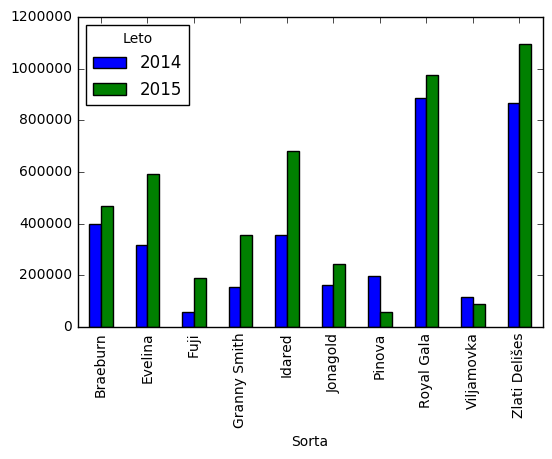

In [308]:
tabela_top_sort.groupby(['Sorta', 'Leto']).sum().unstack().plot(kind='bar', y ='Količina [kg]')

,Dobavitelj
0,Kodrič Milena
1,Kodrič Milena
2,Kodrič Milena
3,Kodrič Milena
4,Kodrič Milena
5,Kodrič Milena
6,Kodrič Milena
7,Kodrič Milena
8,Levak Andrej
9,BIF-VORPO


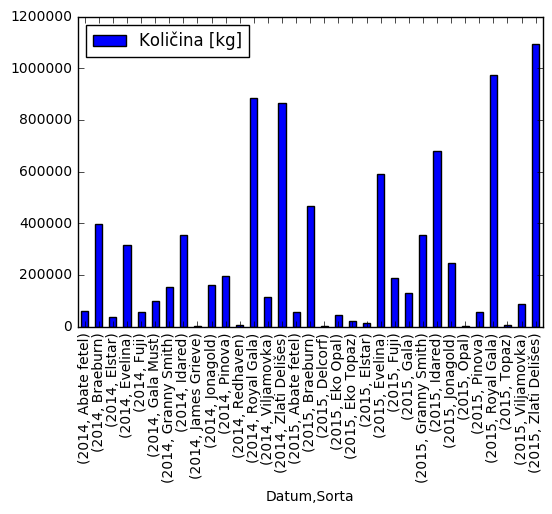

In [171]:
sorte_po_letih.plot(kind='bar')

In [ ]:
prva_klasa

In [97]:
kvaliteta[['Sorta', 'Količina [kg]']]

,Sorta,Količina [kg]
0,Redhaven,820.000
1,Redhaven,659.000
2,Redhaven,1.073
3,Redhaven,1.364
4,Redhaven,1.135
5,Redhaven,1.342
6,Redhaven,924.000
7,Redhaven,1.035
8,James Grieve,1.453
9,Viljamovka,21.789


In [99]:
kvaliteta.groupby(['Sorta']).count()

,Datum,Dobavitelj,Kvaliteta,Količina [kg]
Sorta,,,,
Abate fetel,7,7,7,7
Braeburn,92,92,92,92
Delcorf,2,2,2,2
Eko Opal,11,11,11,11
Eko Topaz,7,7,7,7
Elstar,24,24,24,24
Evelina,84,84,84,84
Fuji,40,40,40,40
Gala,32,32,32,32


npr. sedemkrat je bila Abate fetel pripeljana. Jaz pa hočem, koliko dobaviteljev jo je pripeljalo ...

In [88]:
kvaliteta.groupby(['Dobavitelj']).get_group('Mustar Alojz')

,Datum,Dobavitelj,Sorta,Kvaliteta,Količina [kg]
304,1.10.2014,Mustar Alojz,Idared,I.,893.0
305,1.10.2014,Mustar Alojz,Braeburn,I.,999.0
306,1.10.2014,Mustar Alojz,Jonagold,I.,612.0
329,6.10.2014,Mustar Alojz,Idared,I.,546.0
352,10.09.2014,Mustar Alojz,Idared,I.,546.0


Mustar Alojz (ki je največji dobavitelj 1. klase) je pripeljal sadje na te datume.